In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("reviews.csv")
df.head()

,rating,date,review,platform
0,2,30 December 2024,"I was using it for long time, but have to stop...",blinkit
1,1,4 November 2024,Loving the fast deliveries and mostly they are...,blinkit
2,1,31 October 2024,The customer support is very disappointing. I ...,blinkit
3,5,29 August 2024,"I've been using Blinkit for a while now, and i...",blinkit
4,2,31 December 2024,Blinkit was my go to app and it was rare that ...,blinkit


In [2]:
df.isnull().sum()

rating      0
date        0
review      0
platform    0
dtype: int64

In [3]:
df["date"] = pd.to_datetime(df["date"], errors = "coerce")
df.dropna(subset = ["date"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   rating    4620 non-null   int64         
 1   date      4620 non-null   datetime64[ns]
 2   review    4620 non-null   object        
 3   platform  4620 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 144.5+ KB


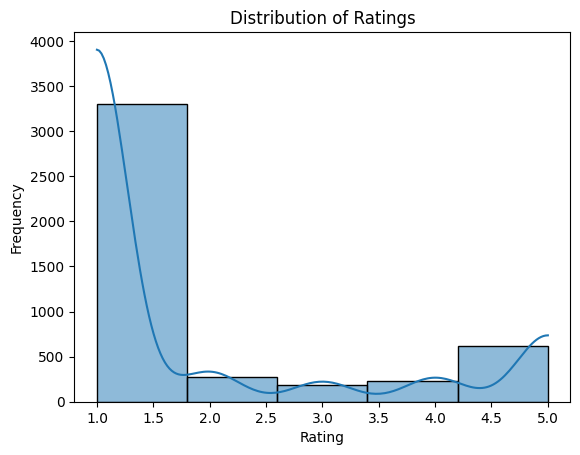

In [4]:
sns.histplot(df["rating"], bins = 5, kde = True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

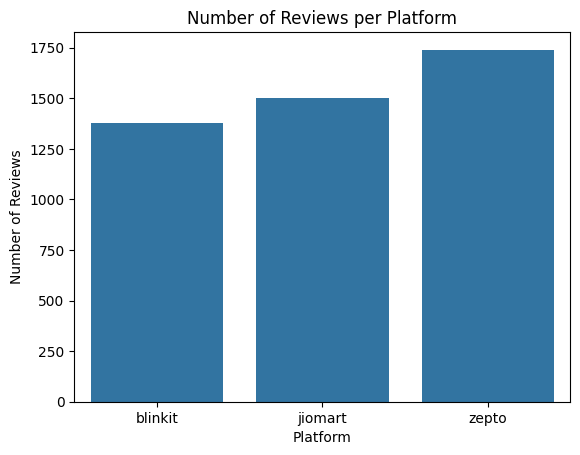

In [5]:
sns.countplot(x = "platform", data = df)
plt.title("Number of Reviews per Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Reviews")
plt.show()

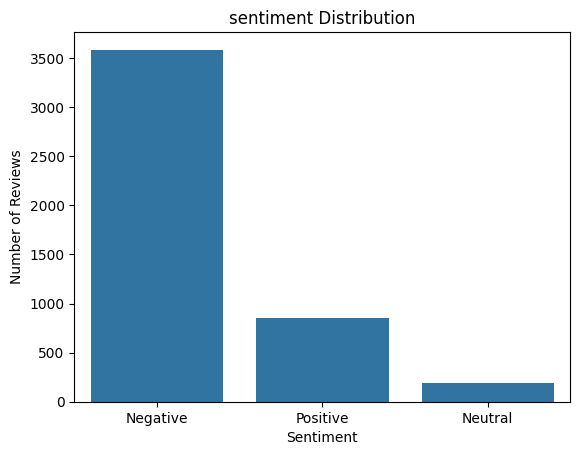

In [6]:
def sentiment_label(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

df["sentiment"] = df["rating"].apply(sentiment_label)

sns.countplot(x = "sentiment", data = df)
plt.title("sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix

(0.8257575757575758,
 array([[711,   0,   0],
        [ 32,   0,   0],
        [129,   0,  52]]))